In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn') 

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix 

In [3]:
data = pd.read_csv('online_shoppers_intention.csv') 
data.head()  

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
temp_month = pd.get_dummies(data['Month'])  
temp_weekend = pd.get_dummies(data['Weekend'], prefix='Weekend_')   
temp_visitor_type = pd.get_dummies(data['VisitorType']) 
data['Revenue_label'] = 0 
data.loc[data.Revenue == True, 'Revenue_label'] = 1 

In [5]:
X = pd.concat([data, temp_month, temp_visitor_type, temp_weekend], axis=1)  
X[0:10]  

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,Weekend__False,Weekend__True
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,...,0,0,0,0,0,0,0,1,1,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,...,0,0,0,0,0,0,0,1,1,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,...,0,0,0,0,0,0,0,1,1,0


In [6]:
# target variable 
y = X['Revenue_label']  
y.value_counts() 

0    10422
1     1908
Name: Revenue_label, dtype: int64

In [7]:
X.drop(['VisitorType', 'Month', 'Weekend', 'Revenue', 'Revenue_label'], axis=1, inplace= True) 

In [8]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Aug', 'Dec',
       'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'New_Visitor',
       'Other', 'Returning_Visitor', 'Weekend__False', 'Weekend__True'],
      dtype='object')

<p style="font-family:ariel; font-weight:600;">Encoded, Not-Scaled, Unsampled Data. </p>

In [9]:
model_eval = dict() 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    test_size = 0.3, random_state = 1)  

<p style="font-family:ariel; font-weight:600;">Model: Decision Tree </p>

In [11]:
dt_model = DecisionTreeClassifier() 
dt_model.fit(X_train, y_train) 
dt_pred = dt_model.predict(X_test) 
model_eval['Decision Tree'] = [round(accuracy_score(y_test, dt_pred)*100, 3), 
                               f1_score(y_test, dt_pred)] 

In [12]:
print(classification_report(y_test, dt_pred))  

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3127
           1       0.56      0.53      0.54       572

    accuracy                           0.86      3699
   macro avg       0.73      0.73      0.73      3699
weighted avg       0.86      0.86      0.86      3699



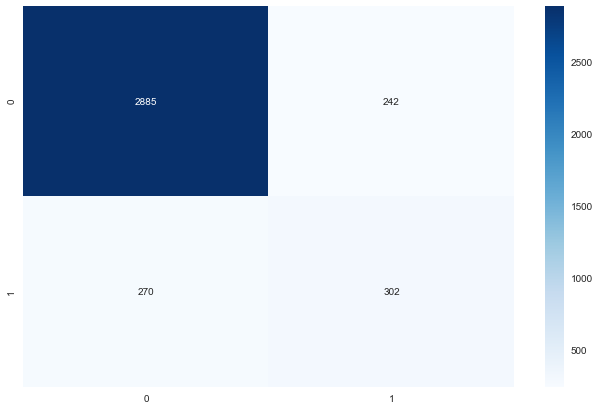

In [13]:
plt.figure(figsize=(11,7))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d', cmap='Blues')   
plt.show() 

<p style="font-family:ariel; font-weight:600;">SVM Classifier</p>

In [14]:
svc_model = SVC(decision_function_shape='ovo', gamma='auto') 
svc_model.fit(X_train, y_train) 
svc_pred = svc_model.predict(X_test) 
model_eval['SVM Classifier'] = [round(accuracy_score(y_test, svc_pred)*100, 3), 
                               f1_score(y_test, svc_pred)]   

In [15]:
print(classification_report(y_test, svc_pred))  

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3127
           1       1.00      0.00      0.01       572

    accuracy                           0.85      3699
   macro avg       0.92      0.50      0.46      3699
weighted avg       0.87      0.85      0.78      3699



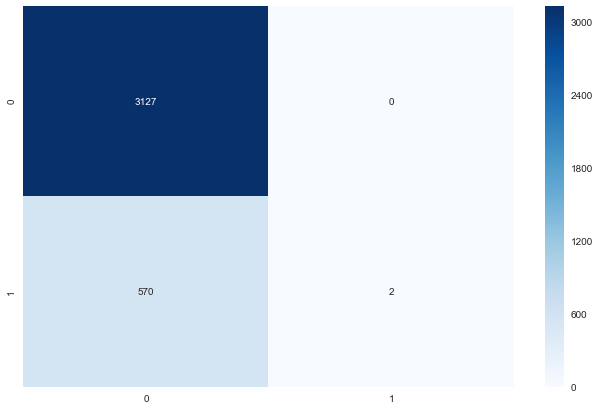

In [16]:
plt.figure(figsize=(11,7))
sns.heatmap(confusion_matrix(y_test, svc_pred), annot=True, fmt='d', cmap='Blues')   
plt.show() 

<p style="font-family:ariel; font-weight:600;">RF Classifier</p>

In [17]:
rf_model = RandomForestClassifier(n_estimators=100 , max_features='auto') 
rf_model.fit(X_train, y_train) 
rf_pred = rf_model.predict(X_test) 
model_eval['RF Classifier'] =  [round(accuracy_score(y_test, rf_pred)*100, 3), 
                               f1_score(y_test, rf_pred)]    

In [18]:
print(classification_report(y_test, rf_pred))  

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3127
           1       0.77      0.55      0.64       572

    accuracy                           0.91      3699
   macro avg       0.85      0.76      0.79      3699
weighted avg       0.90      0.91      0.90      3699



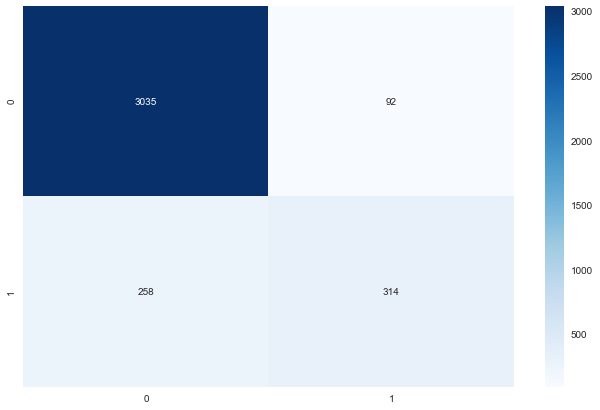

In [19]:
plt.figure(figsize=(11,7))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')   
plt.show() 

<p style="font-family:ariel; font-weight:600;">Oversampled Data</p> 